# Internet Speed Test

Measure and report internet speed test using speedtest.net. Chart results over time.

Used for sampling our overloaded internet during COVID-19 shutdowns.

Requires the [speedtest-cli](https://github.com/sivel/speedtest-cli) package. The [derekwlms/jupyter-notebook](https://hub.docker.com/repository/docker/derekwlms/jupyter-notebook) docker image includes this.

In [1]:
import pandas as pd
import speedtest
from IPython.display import Image

servers = []
threads = None
results = []

In [2]:
s = speedtest.Speedtest()
s.get_servers(servers)
s.get_best_server()

{'url': 'http://speedtest.rd.at.cox.net:8080/speedtest/upload.php',
 'lat': '34.0754',
 'lon': '-84.2941',
 'name': 'Alpharetta, GA',
 'country': 'United States',
 'cc': 'US',
 'sponsor': 'Cox - Atlanta',
 'id': '16611',
 'host': 'speedtest.rd.at.cox.net:8080',
 'd': 54.290775175552795,
 'latency': 24.0}

In [3]:
s.download(threads=threads)

41760425.05840292

In [4]:
s.upload(threads=threads)

2377525.146873303

In [5]:
results_image = s.results.share()
Image(url=results_image)

In [6]:
results_dict = s.results.dict()
results_dict

{'download': 41760425.05840292,
 'upload': 2377525.146873303,
 'ping': 24.0,
 'server': {'url': 'http://speedtest.rd.at.cox.net:8080/speedtest/upload.php',
  'lat': '34.0754',
  'lon': '-84.2941',
  'name': 'Alpharetta, GA',
  'country': 'United States',
  'cc': 'US',
  'sponsor': 'Cox - Atlanta',
  'id': '16611',
  'host': 'speedtest.rd.at.cox.net:8080',
  'd': 54.290775175552795,
  'latency': 24.0},
 'timestamp': '2020-04-16T02:38:01.209169Z',
 'bytes_sent': 4145152,
 'bytes_received': 52370996,
 'share': 'http://www.speedtest.net/result/9289724901.png',
 'client': {'ip': '98.20.164.79',
  'lat': '33.9978',
  'lon': '-83.7124',
  'isp': 'Windstream Communications',
  'isprating': '3.7',
  'rating': '0',
  'ispdlavg': '0',
  'ispulavg': '0',
  'loggedin': '0',
  'country': 'US'}}

In [7]:
results.append( { "timestamp": results_dict['timestamp'], 
                  "download": results_dict['download'], 
                  "upload": results_dict['upload'] } )

In [8]:
df = pd.DataFrame(results)
df.head()

,timestamp,download,upload
0,2020-04-16T02:38:01.209169Z,4.176043e+07,2.377525e+06


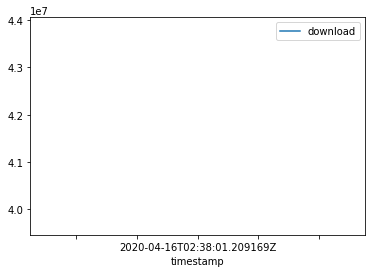

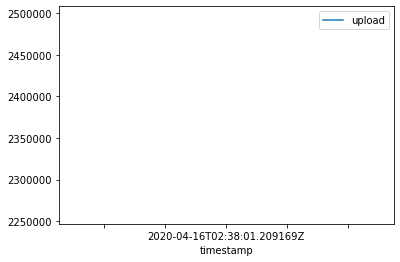

In [9]:
df.plot(x='timestamp', y='download')
df.plot(x='timestamp', y='upload')